# IMPORTANDO LIBRERIAS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('../Data/datos_seattle.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   30657 non-null  int64  
 1   datayear                        30657 non-null  int64  
 2   buildingname                    30657 non-null  object 
 3   buildingtype                    30657 non-null  object 
 4   taxparcelidentificationnumber   30657 non-null  object 
 5   address                         30657 non-null  object 
 6   city                            30657 non-null  object 
 7   state                           30657 non-null  object 
 8   zipcode                         30657 non-null  int64  
 9   latitude                        30657 non-null  float64
 10  longitude                       30657 non-null  float64
 11  neighborhood                    30657 non-null  object 
 12  councildistrictcode             

In [23]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

steamuse_kbtu                     96.552174
thirdlargestpropertyusetypegfa    78.706331
thirdlargestpropertyusetype       78.181166
secondlargestpropertyusetype      42.871122
secondlargestpropertyuse          42.871122
naturalgas_kbtu                   37.475944
naturalgas_therms                 37.475944
energystarscore                   25.958182
siteeuiwn_kbtu_sf                  3.937111
sourceeuiwn_kbtu_sf                3.937111
siteenergyusewn_kbtu               3.920801
siteeui_kbtu_sf                    2.925922
sourceeui_kbtu_sf                  2.925922
siteenergyuse_kbtu                 2.909613
electricity_kwh                    1.895163
electricity_kbtu                   1.891901
ghgemissionsintensity              1.630949
totalghgemissions                  1.624425
complianceissue                    1.063379
numberofbuildings                  0.958998
numberoffloors                     0.270738
largestpropertyusetype             0.153309
largestpropertyusetypegfa       

Al analizar el conjunto de datos, se observa que las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse presentan un alto porcentaje de valores nulos, específicamente 78.7% y 42.9% respectivamente. Además, dado que el objetivo principal es predecir el consumo total de energía, estas variables no aportan información relevante para el análisis.

Consideraciones:

- Alto porcentaje de datos faltantes: Columnas con un elevado número de valores nulos pueden introducir sesgos y reducir la precisión del modelo. Cuando una variable tiene más del 80% de datos faltantes, es común considerar su eliminación para mantener la integridad del análisis. ​
Medium

- Relevancia para el modelo: Dado que el interés se centra en predecir el consumo total de energía, y estas columnas están relacionadas con usos secundarios o terciarios de la propiedad, su contribución al modelo es limitada.

Conclusión:

Debido al alto porcentaje de valores nulos y a su baja relevancia para el objetivo del análisis, procederé a eliminar las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse del conjunto de datos. Esta acción permitirá simplificar el modelo y mejorar su rendimiento al centrarse en variables más completas y pertinentes.

In [24]:
treshold = 37

serie_a_eliminar = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

columnas_a_eliminar = serie_a_eliminar[serie_a_eliminar>treshold].index.to_list()

df.drop(columns=columnas_a_eliminar, inplace=True)

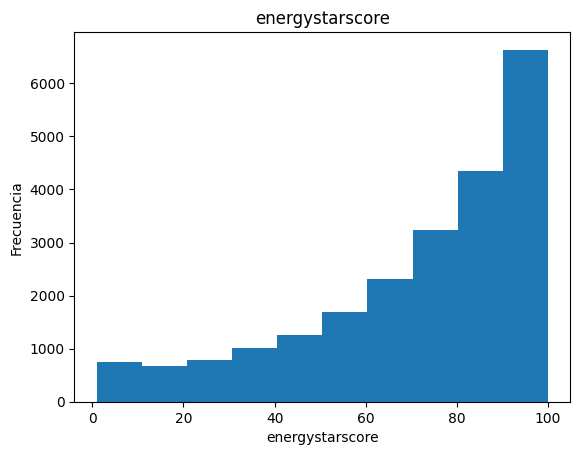

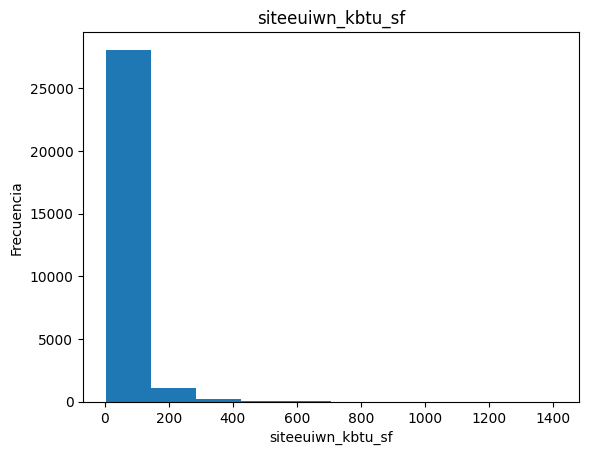

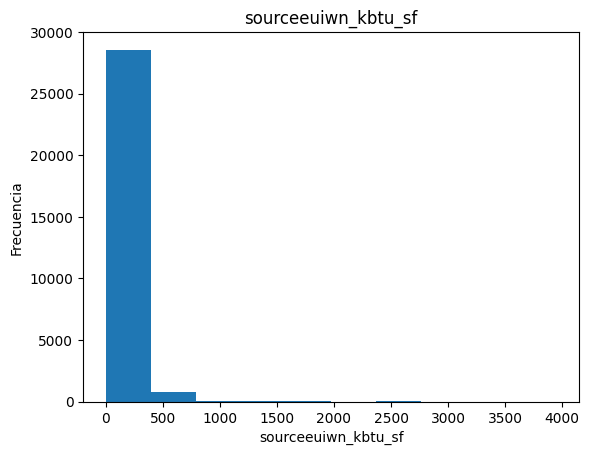

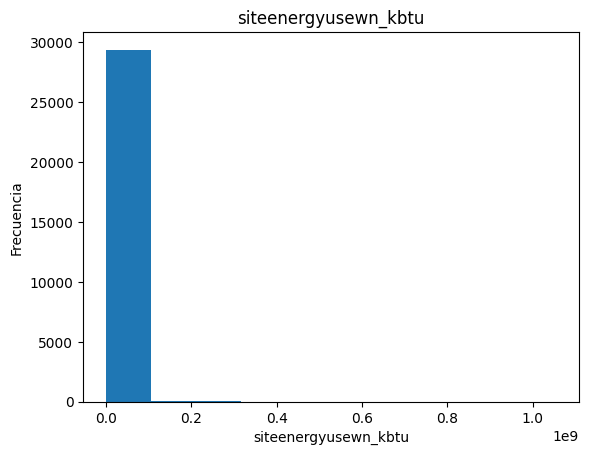

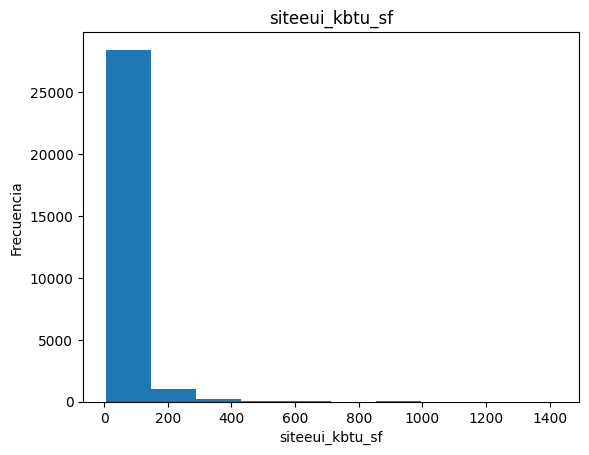

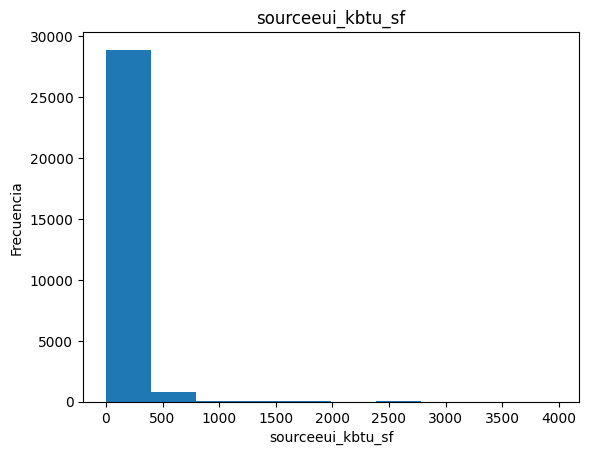

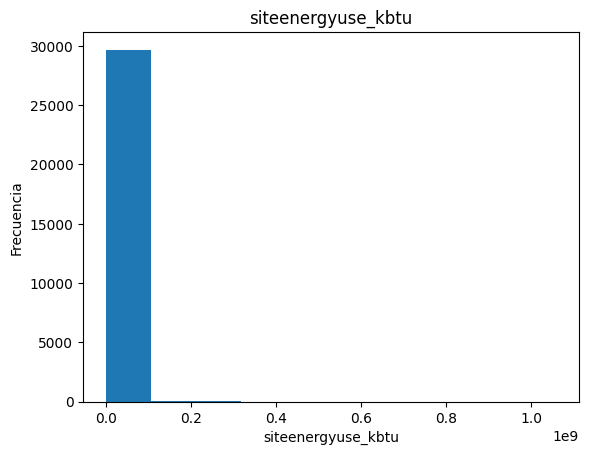

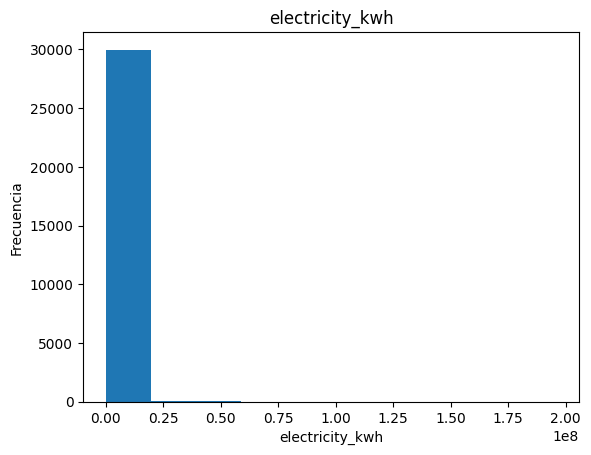

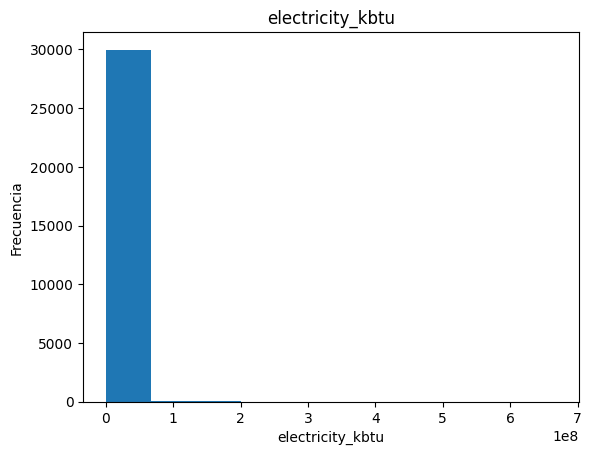

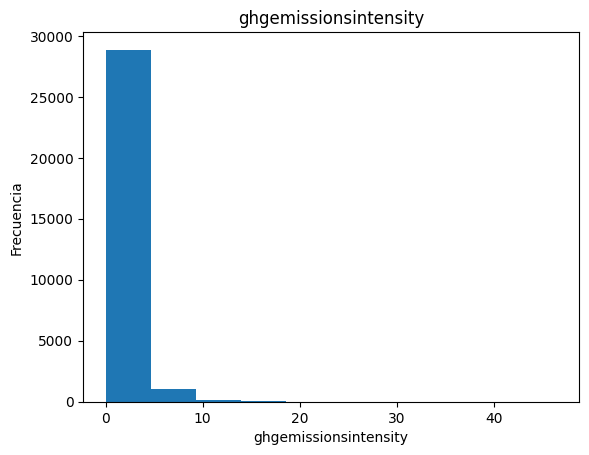

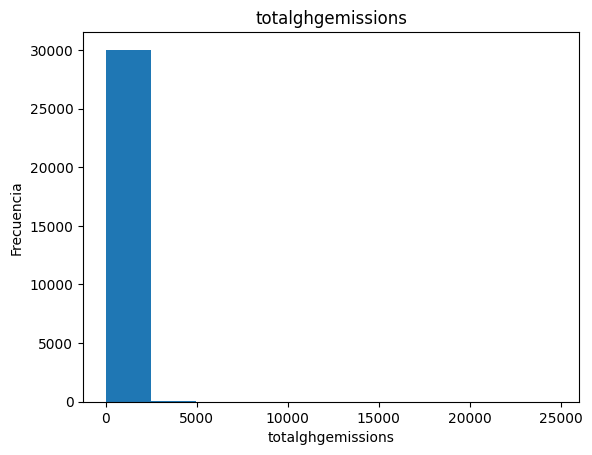

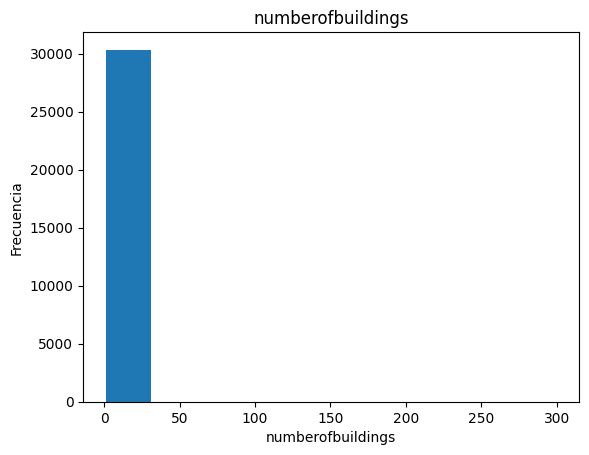

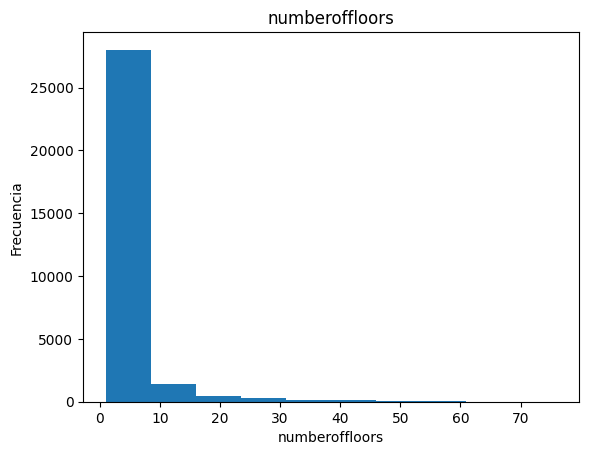

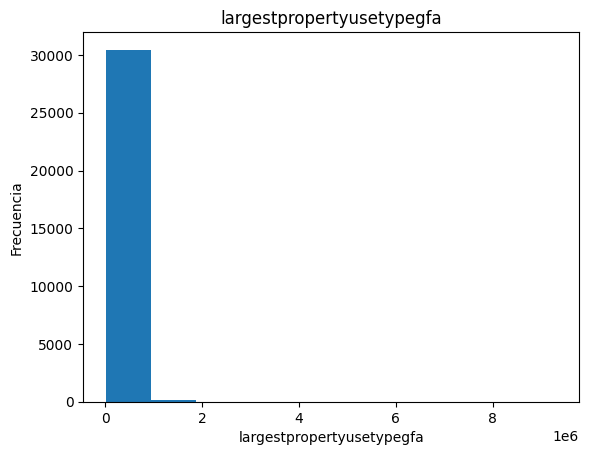

In [25]:
treshold = 0
series_nulos = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

for col in series_nulos[series_nulos>treshold].index:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()


In [26]:
input_columns = [col for col in series_nulos[series_nulos>treshold].index if pd.api.types.is_numeric_dtype(df[col])]
input_columns
    

['energystarscore',
 'siteeuiwn_kbtu_sf',
 'sourceeuiwn_kbtu_sf',
 'siteenergyusewn_kbtu',
 'siteeui_kbtu_sf',
 'sourceeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'electricity_kwh',
 'electricity_kbtu',
 'ghgemissionsintensity',
 'totalghgemissions',
 'numberofbuildings',
 'numberoffloors',
 'largestpropertyusetypegfa']

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[input_columns] = imputer.fit_transform(df[input_columns])

In [28]:
df.isnull().sum()

osebuildingid                      0
datayear                           0
buildingname                       0
buildingtype                       0
taxparcelidentificationnumber      0
address                            0
city                               0
state                              0
zipcode                            0
latitude                           0
longitude                          0
neighborhood                       0
councildistrictcode                0
yearbuilt                          0
numberoffloors                     0
numberofbuildings                  0
propertygfatotal                   0
propertygfabuildings               0
propertygfaparking                 0
selfreportgfatotal                 0
selfreportgfabuildings             0
selfreportparking                  0
energystarscore                    0
siteeuiwn_kbtu_sf                  0
siteeui_kbtu_sf                    0
siteenergyuse_kbtu                 0
siteenergyusewn_kbtu               0
s

In [29]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

complianceissue                  1.063379
largestpropertyusetype           0.153309
epapropertytype                  0.127214
buildingtype                     0.000000
osebuildingid                    0.000000
datayear                         0.000000
buildingname                     0.000000
city                             0.000000
address                          0.000000
taxparcelidentificationnumber    0.000000
state                            0.000000
neighborhood                     0.000000
zipcode                          0.000000
latitude                         0.000000
longitude                        0.000000
numberofbuildings                0.000000
propertygfatotal                 0.000000
propertygfabuildings             0.000000
propertygfaparking               0.000000
selfreportgfatotal               0.000000
councildistrictcode              0.000000
yearbuilt                        0.000000
numberoffloors                   0.000000
energystarscore                  0

In [30]:
df = df.dropna(subset=['complianceissue', 'largestpropertyusetype', 'epapropertytype'])


In [31]:
df.isnull().sum().sum()

np.int64(0)

In [32]:
df

,osebuildingid,datayear,buildingname,buildingtype,taxparcelidentificationnumber,address,city,state,zipcode,latitude,...,epapropertytype,largestpropertyusetype,largestpropertyusetypegfa,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,...,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2,2023,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101,47.61307,...,Hotel,Hotel,88502.0,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,3,2023,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,...,Hotel,Hotel,827566.0,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,5,2023,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,...,Hotel,Hotel,61320.0,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,8,2023,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,...,Hotel,Hotel,123445.0,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,50038,2015,Salmon Bay Marine Center West,NonResidential,2771605298,2360 W COMMODORE WAY,SEATTLE,WA,98199,47.66144,...,Mixed Use Property,Office,11745.0,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,50049,2015,PACIFIC CENTER CONDOMINIUM,Multifamily LR (1-4),6599950000,321 10TH AVE S,SEATTLE,WA,98104,47.59980,...,Multifamily LR (1-4),Multifamily Housing,44650.0,334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,50055,2015,IDENTITY APTS 4123,Multifamily MR (5-9),1142001670,4123 12TH AVE NE,SEATTLE,WA,98105,47.65756,...,Multifamily MR (5-9),Multifamily Housing,31748.0,325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,50057,2015,CIRRUS,Multifamily HR (10+),660000575,2030 8TH AVE,SEATTLE,WA,98121,47.61652,...,Multifamily HR (10+),Multifamily Housing,414026.0,1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


In [43]:
for col in df.select_dtypes(include=['object']).columns:
    print('----'*45)
    print(df[col].value_counts())
    print('\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingname
WAREHOUSE                                   70
OFFICE BUILDING                             54
BRENTWOOD SQUARE APTS                       27
CANAL PL OFFICE PARK                        27
APARTMENTS                                  27
                                            ..
SEATTLE LUTHERAN HIGH SCHOOL                 1
UW - KINCAID HALL                            1
401 ELLIOTT WEST                             1
VAN ASSELT BLDG RENOVATED (SPS-DISTRICT)     1
TEATRO ZINZANNI-demo'd                       1
Name: count, Length: 3715, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingtype
NonResidential          11970
Multifamily LR (1-4)   

In [34]:
df.groupby(['osebuildingid']).size()

osebuildingid
1        9
2        9
3        9
5        9
8        9
        ..
50946    1
50948    1
50953    1
50954    1
50956    1
Length: 3751, dtype: int64

In [35]:
df[df['osebuildingid']==1]

,osebuildingid,datayear,buildingname,buildingtype,taxparcelidentificationnumber,address,city,state,zipcode,latitude,...,epapropertytype,largestpropertyusetype,largestpropertyusetypegfa,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,1,2023,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
3654,1,2022,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1107295.0,Compliant,No Issue,3778091.0,271.7,3.07,False
7227,1,2021,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,944955.0,Compliant,No Issue,3224187.0,243.2,2.75,False
10766,1,2020,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,801392.0,Compliant,No Issue,2734351.0,167.5,1.89,False
14245,1,2019,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1134817.0,Compliant,No Issue,3871996.0,267.3,3.02,False
17667,1,2018,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1145355.0,Compliant,No Issue,3907951.0,266.7,3.02,False
21020,1,2017,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1157783.0,Compliant,No Issue,3950356.0,263.2,2.98,False
24296,1,2016,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1156514.0,Compliant,No Issue,3946026.0,252.9,2.86,False
27510,1,2015,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,...,Hotel,Hotel,88434.0,1080307.0,Compliant,No Issue,3686007.0,252.7,2.86,False


In [36]:
df.columns

Index(['osebuildingid', 'datayear', 'buildingname', 'buildingtype',
       'taxparcelidentificationnumber', 'address', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'neighborhood', 'councildistrictcode',
       'yearbuilt', 'numberoffloors', 'numberofbuildings', 'propertygfatotal',
       'propertygfabuildings', 'propertygfaparking', 'selfreportgfatotal',
       'selfreportgfabuildings', 'selfreportparking', 'energystarscore',
       'siteeuiwn_kbtu_sf', 'siteeui_kbtu_sf', 'siteenergyuse_kbtu',
       'siteenergyusewn_kbtu', 'sourceeuiwn_kbtu_sf', 'sourceeui_kbtu_sf',
       'epapropertytype', 'largestpropertyusetype',
       'largestpropertyusetypegfa', 'electricity_kwh', 'compliancestatus',
       'complianceissue', 'electricity_kbtu', 'totalghgemissions',
       'ghgemissionsintensity', 'demolished'],
      dtype='object')